# **Airbnb Listing EDA**

# **BRIEF:**
The code performs an exploratory data analysis (EDA) on Airbnb listings data for the city of Madrid.

It includes:

1- reading the data

2-data cleaning (searching for the nulls and deal with them)

3-Visualizations

4-analysis

5-Conclusion

6-What can be done to improve Airbnb services according to my analysis
(http://insideairbnb.com/get-the-data/)




import the needed libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

read the data


In [ ]:
df=pd.read_csv("Madrid.csv")

Displaying the first and last few rows


In [ ]:
df.head(4)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,6369,Rental unit in Madrid · ★4.87 · 1 bedroom · 1 ...,13660.0,Simon,Chamartín,Hispanoamérica,40.457240,-3.676880,Private room,90.0,4.0,104.0,5/31/2023,0.65,1.0,98.0,9.0,NaN
1,21853,Rental unit in Madrid · ★4.58 · 1 bedroom · 1 ...,83531.0,Abdel,Latina,Cármenes,40.403810,-3.741300,Private room,31.0,4.0,33.0,7/15/2018,0.31,2.0,313.0,0.0,NaN
2,451174,casa particular in Madrid · ★4.71 · 1 bedroom ...,2240898.0,Alejandro,Chamberí,Almagro,40.434551,-3.698387,Private room,47.0,3.0,33.0,6/5/2023,0.53,1.0,72.0,21.0,NaN
3,24805,Rental unit in Madrid · ★4.90 · 6 bedrooms · 1...,346366726.0,Alvaro,Centro,Universidad,40.421830,-3.705290,Entire home/apt,92.0,5.0,29.0,5/23/2023,0.28,1.0,161.0,11.0,NaN


In [ ]:
df.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
11907,49085299,Loft in Madrid · ★4.43 · Studio · 1 bed · 1 bath,107141654.0,Leeways,Centro,Palacio,40.41250,-3.70770,Entire home/apt,78.0,3.0,79.0,3.11,95.0,157.0,44.0
11908,49085642,Rental unit in Madrid · ★4.0 · 2 bedrooms · 3 ...,325540127.0,Cayetano,Centro,Cortes,40.41209,-3.69341,Entire home/apt,119.0,3.0,6.0,0.25,25.0,264.0,3.0
11909,48969188,Loft in Madrid · ★4.73 · Studio · 1 bed · 1 bath,107141654.0,Leeways,Centro,Embajadores,40.41270,-3.70675,Entire home/apt,100.0,3.0,96.0,3.70,95.0,158.0,62.0
11910,49085752,Rental unit in Madrid · ★4.54 · 1 bedroom · 1 ...,394938081.0,Homelikes,Carabanchel,Vista Alegre,40.38960,-3.73461,Entire home/apt,85.0,3.0,41.0,1.69,4.0,51.0,23.0
11911,48972633,Rental unit in Madrid · ★4.80 · 1 bedroom · 2 ...,107141654.0,Leeways,Centro,Embajadores,40.41248,-3.70680,Entire home/apt,115.0,3.0,93.0,3.55,95.0,168.0,49.0


The number of rows and columns in the dataset I loaded

In [ ]:
df.shape

(11909, 16)

Displaying the columns names

In [ ]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license'],
      dtype='object')

displaying info about each column---->including the no of nulls and the data type stored in it


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11913 entries, 0 to 11912
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              11913 non-null  int64  
 1   name                            11913 non-null  object 
 2   host_id                         11912 non-null  float64
 3   host_name                       11909 non-null  object 
 4   neighbourhood_group             11912 non-null  object 
 5   neighbourhood                   11912 non-null  object 
 6   latitude                        11912 non-null  float64
 7   longitude                       11912 non-null  float64
 8   room_type                       11912 non-null  object 
 9   price                           11912 non-null  float64
 10  minimum_nights                  11912 non-null  float64
 11  number_of_reviews               11912 non-null  float64
 12  last_review                     

 computes a summary of statistics regarding each numerical column

In [ ]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,1.191300e+04,1.191200e+04,11912.000000,11912.000000,11912.000000,11912.000000,11912.000000,9984.000000,11912.000000,11912.000000,11912.000000
mean,2.657264e+07,1.138621e+08,40.421023,-3.694516,174.918905,8.086971,67.355440,1.322799,10.658580,134.706850,14.963482
std,1.326848e+07,1.076257e+08,0.022246,0.027851,1342.615568,43.485617,101.073321,1.537704,26.763338,131.109918,23.186933
min,6.369000e+03,7.952000e+03,40.332210,-3.832630,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,1.680190e+07,2.230429e+07,40.409650,-3.707590,47.000000,1.000000,2.000000,0.180000,1.000000,0.000000,0.000000
50%,2.730151e+07,7.875986e+07,40.419410,-3.701427,88.000000,2.000000,23.000000,0.760000,2.000000,94.000000,3.000000
75%,3.720170e+07,1.936854e+08,40.429623,-3.688028,150.000000,3.000000,93.000000,1.960000,6.000000,258.000000,23.000000
max,4.908575e+07,5.159559e+08,40.536230,-3.560490,85110.000000,1125.000000,913.000000,16.170000,266.000000,365.000000,269.000000


searching for duplicated rows

In [ ]:
duplicates = df.duplicated()
duplicate_rows = df[duplicates]
print(duplicate_rows)

Empty DataFrame
Columns: [id, name, host_id, host_name, neighbourhood_group, neighbourhood, latitude, longitude, room_type, price, minimum_nights, number_of_reviews, reviews_per_month, calculated_host_listings_count, availability_365, number_of_reviews_ltm]
Index: []



**conclusion: the DataFrame df does not contain any duplicate rows**




searching for null values and their count at each column

In [ ]:
df.isna()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11908,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
11909,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
11910,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
11911,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


In [ ]:
df.isna().sum()

id                                   0
name                                 0
host_id                              1
host_name                            4
neighbourhood_group                  1
neighbourhood                        1
latitude                             1
longitude                            1
room_type                            1
price                                1
minimum_nights                       1
number_of_reviews                    1
last_review                       1929
reviews_per_month                 1929
calculated_host_listings_count       1
availability_365                     1
number_of_reviews_ltm                1
license                           9828
dtype: int64

I have decided to exclude the "license" column as it does not seem relevant. Additionally, I will drop  the "last review" column (it has 1929 nulls) and instead focus on analyzing the reviews per month, as it provides more valuable insights. Any missing values in the "reviews per month" column will be filled with 0 

In [ ]:
df=df.drop(["license","last_review"],axis=1)

In [ ]:
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)

In [ ]:
df.isna().sum()

id                                0
name                              0
host_id                           1
host_name                         4
neighbourhood_group               1
neighbourhood                     1
latitude                          1
longitude                         1
room_type                         1
price                             1
minimum_nights                    1
number_of_reviews                 1
reviews_per_month                 0
calculated_host_listings_count    1
availability_365                  1
number_of_reviews_ltm             1
dtype: int64

The rest of null values (count) is trival so I will drop them

In [ ]:
df=df.dropna()

In [ ]:
df.isna().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
dtype: int64

**We don't have NULLS anymore**

# **Calculate and Visualize the number of listings at each host**


In [ ]:
df['host_name'].value_counts().reset_index().head(20)


,index,host_name
0,Javier,170
1,Carlos,159
2,Daniel,144
3,Ana,129
4,Maria,128
5,Antonio,119
6,Luis,95
7,Jorge,93
8,David,92
9,Miguel,85


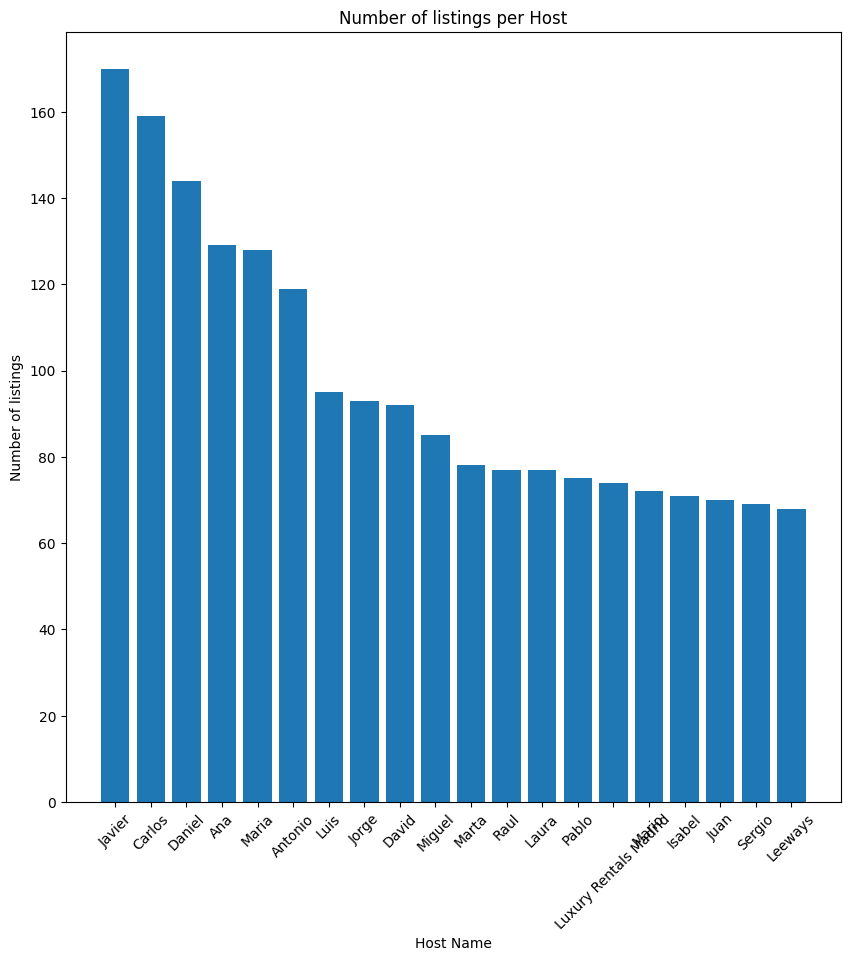

In [ ]:
host_counts = df['host_name'].value_counts().reset_index().head(20)
host_names = host_counts['index']
flat_counts = host_counts['host_name']
plt.figure(figsize=(10,10))
plt.bar(host_names, flat_counts)
plt.xlabel('Host Name')
plt.ylabel('Number of listings')
plt.title('Number of listings per Host')
plt.xticks(rotation=45)
plt.show()

# **Conclusion:**

# **the upper plot shows the top 20 host in Madrid(listing wise)**

# **result:**

1-Javier came in first place with Javier with	170 listings

2-Carlos came in second place with 159 listings

3-Daniel came in third place with	144 listing

# **VISUALIZE THE TOP 10 HOSTS WITH HIGHEST NUMBER OF REVIEWS**

In [ ]:
review_counts = df.groupby('host_name')['number_of_reviews'].sum()
sorted_hosts = review_counts.sort_values(ascending=False)
sorted_hosts.head(10)

host_name
Javier                     13903.0
Amazinn Places             12261.0
Raul                       11711.0
Leeways                    11413.0
Apartamentos Day Madrid    10884.0
Daniel                      9451.0
Carlos                      8388.0
Luis                        8310.0
Antonio                     8284.0
Edu                         7857.0
Name: number_of_reviews, dtype: float64

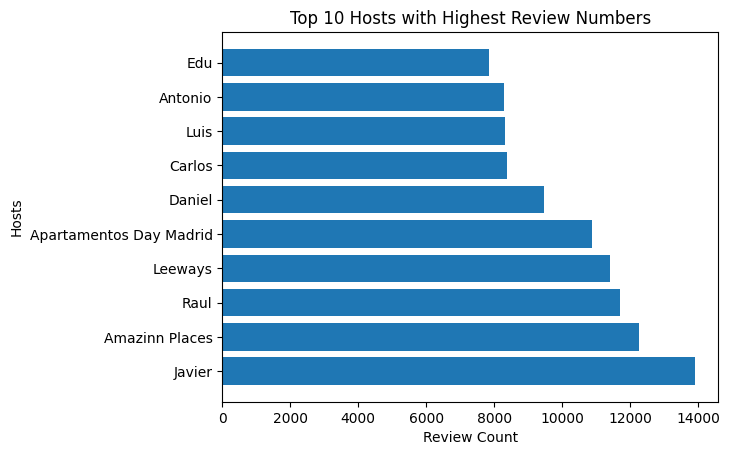

In [ ]:
dis = sorted_hosts.head(10)
plt.barh(dis.index, dis.values)
plt.xlabel('Review Count')
plt.ylabel('Hosts')
plt.title('Top 10 Hosts with Highest Review Numbers')
plt.show()


# **conclusion:**

**Javier  in first palce with  13903.0 reviews**

**Amazinn Places  in second place with  12261.0 reviews**

**Raul in third place with 11711.0 reviews**

**Leeways in fourth place with 11413.0 reviews**

groups the data by host name and neighborhood group, calculates the maximum value of the calculated_host_listings_count for each group, and  This allows you to identify the hosts and their corresponding neighborhood groups with the highest number of calculated host listings.

In [ ]:
host_areas = df.groupby(['host_name','neighbourhood_group'])['calculated_host_listings_count'].max().reset_index()
host_areas=host_areas.sort_values('calculated_host_listings_count', ascending=False).head(10)
host_areas

,host_name,neighbourhood_group,calculated_host_listings_count
3174,Marco,Chamberí,266.0
3173,Marco,Chamartín,266.0
3177,Marco,Salamanca,266.0
3179,Marco,Tetuán,266.0
3176,Marco,Retiro,266.0
3172,Marco,Centro,266.0
1621,Fran Y Marta,Arganzuela,180.0
1628,Fran Y Marta,Tetuán,180.0
1627,Fran Y Marta,Salamanca,180.0
1626,Fran Y Marta,Retiro,180.0


coclusion:
The first host-->marco has in Chamberí ,Chamartín ,Tetuán ,Retiro,Centro 266.0 listings

second host Fran Y Marta has in Arganzuela ,Tetuán,Salamanca,Retiro	180.0 listings



Then we are going to display each neighbourhood_group to its corresponding calculated_host_listings_count

In [ ]:
neighborhood_counts = df.groupby('neighbourhood_group')['calculated_host_listings_count'].sum().reset_index()
neighborhood_counts = neighborhood_counts.sort_values('calculated_host_listings_count', ascending=False).head(10)
neighborhood_counts

,neighbourhood_group,calculated_host_listings_count
3,Centro,70724.0
14,Salamanca,14123.0
5,Chamberí,10247.0
0,Arganzuela,5091.0
13,Retiro,4726.0
16,Tetuán,3634.0
10,Moncloa - Aravaca,3469.0
4,Chamartín,3404.0
12,Puente de Vallecas,3106.0
2,Carabanchel,1949.0


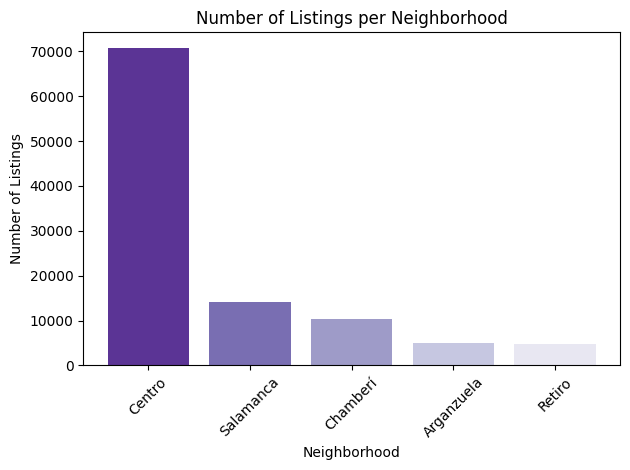

In [ ]:
neighborhood_counts = df.groupby('neighbourhood_group')['calculated_host_listings_count'].sum().reset_index()
neighborhood_counts = neighborhood_counts.sort_values('calculated_host_listings_count', ascending=False).head(5)
colors = sns.color_palette('Purples_r', len(neighborhood_counts))
plt.bar(neighborhood_counts['neighbourhood_group'], neighborhood_counts['calculated_host_listings_count'], color=colors)
plt.title('Number of Listings per Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# **Conclusion:**

**the first neighbourhood_group came as**

**Centro with 70724.0 listings**

**the second was Salamanca  with 14123.0 listings**

**the third was Chamberí with	10247.0 listings**

**the fourth was	Arganzuela with	5091.0 listings**

the fifth was Retiro with	4726.0 listings **bold text**

**This pie chart gives better understanding on how much is "CENTRO" taking up to 46.4%  of the listings**


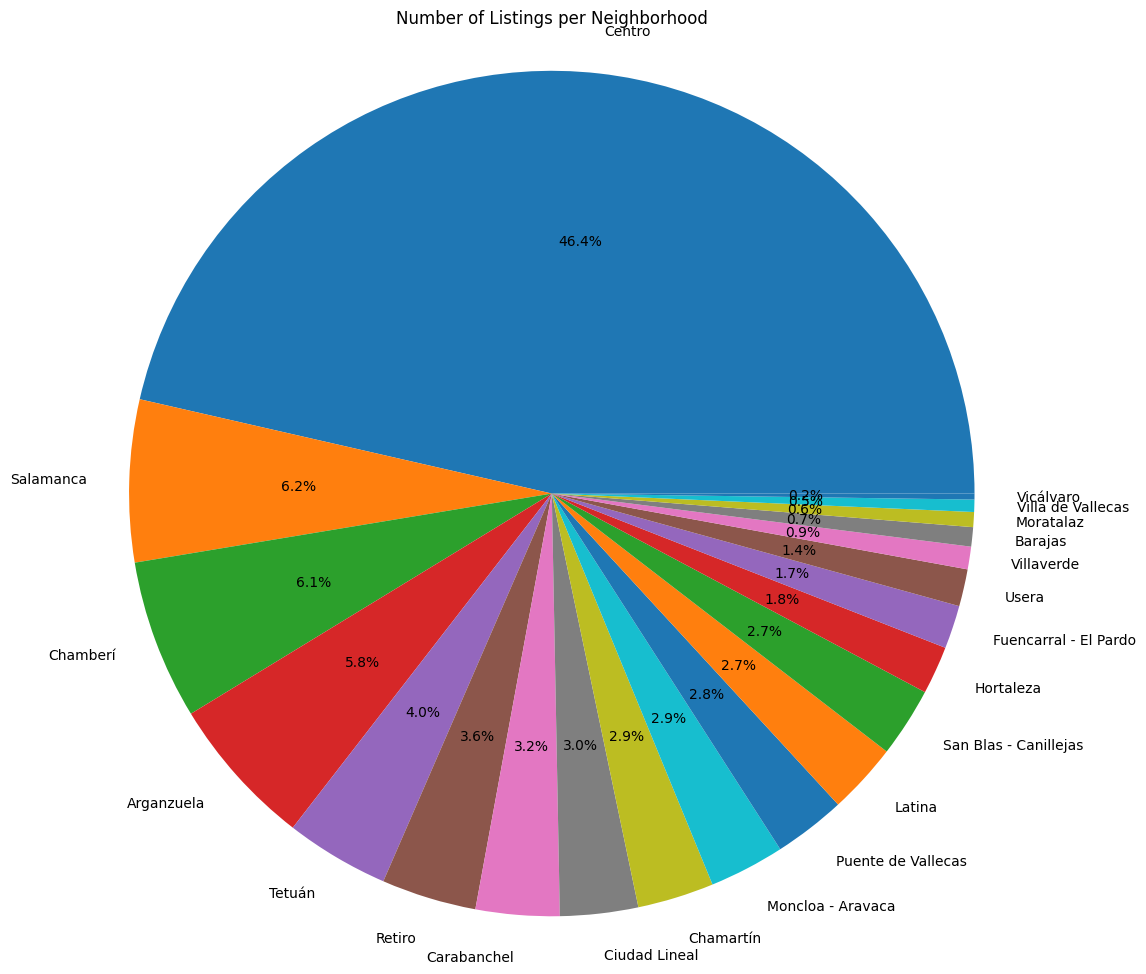

In [ ]:

neighborhood_counts = df['neighbourhood_group'].value_counts()
plt.figure(figsize=(12,12))
plt.pie(neighborhood_counts, labels=neighborhood_counts.index, autopct='%1.1f%%')
plt.title('Number of Listings per Neighborhood')
plt.axis('equal')
plt.show()

**Visualize the number of reviews at each neighbourhood_group**

In [ ]:
max_reviews=df.groupby('neighbourhood_group')['number_of_reviews'].sum().reset_index()
max_reviews=max_reviews.sort_values(by='number_of_reviews', ascending=False).head(10)

In [ ]:
max_reviews

,neighbourhood_group,number_of_reviews
3,Centro,529483.0
0,Arganzuela,49690.0
14,Salamanca,31381.0
5,Chamberí,24436.0
13,Retiro,23875.0
16,Tetuán,19184.0
12,Puente de Vallecas,13835.0
6,Ciudad Lineal,12800.0
2,Carabanchel,12307.0
9,Latina,11836.0


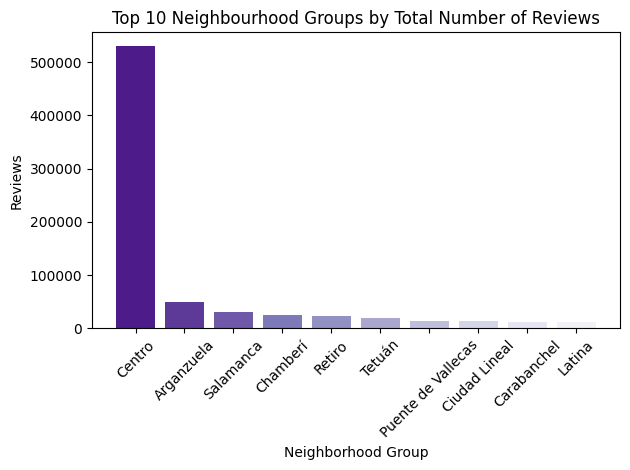

In [ ]:
neighborhood_counts = max_reviews
colors = sns.color_palette('Purples_r', len(neighborhood_counts))
plt.bar(max_reviews['neighbourhood_group'], max_reviews['number_of_reviews'], color=colors)
plt.title('Top 10 Neighbourhood Groups by Total Number of Reviews')
plt.xlabel('Neighborhood Group')
plt.ylabel('Reviews')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# **From the uooer bar chart we can deduce that:**
# The top 5 neighborhood group (total no of reviews wise) **bold text**


**Centro in first place with total number of reviews 	529483.0**

**Arganzuela in second place with total number of reviews	49690.0**

**Salamanca in third place with total number of reviews	31381.0**
  
**Chamberí in fourth place with total number of reviews	24436.0**

**Retiro in fifth place with total number of reviews 	23875.0**

In the comming code segment we are going to visualize each room type and its number of listings

In [ ]:
room_type_counts = df['room_type'].value_counts()
room_type_counts

Entire home/apt    7401
Private room       4232
Shared room         153
Hotel room          123
Name: room_type, dtype: int64

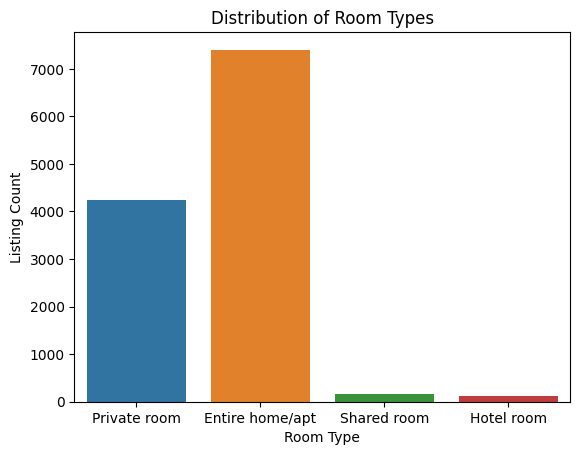

In [ ]:
sns.countplot(data=df, x='room_type')
plt.title('Distribution of Room Types')
plt.xlabel('Room Type')
plt.ylabel('Listing Count')
plt.show()

# **Conclusion:**

**in the first palce Entire home/apt with 7401 listings**

**the second place Private room with 4232 listings**

**the third place Shared room with 153 listings**

**the fourth place came Hotel room with 123 listings**

In [ ]:
grouped_data = df.groupby(['room_type', 'neighbourhood_group']).size().unstack()
print(grouped_data)

neighbourhood_group  Arganzuela  Barajas  Carabanchel  Centro  Chamartín  \
room_type                                                                  
Entire home/apt           411.0     28.0        152.0  4065.0      217.0   
Hotel room                  1.0      NaN          NaN    94.0        4.0   
Private room              275.0     58.0        225.0  1271.0      124.0   
Shared room                 2.0      2.0          4.0    98.0        3.0   

neighbourhood_group  Chamberí  Ciudad Lineal  Fuencarral - El Pardo  \
room_type                                                             
Entire home/apt         400.0          147.0                   84.0   
Hotel room                6.0            1.0                    NaN   
Private room            310.0          198.0                  113.0   
Shared room              11.0            9.0                    NaN   

neighbourhood_group  Hortaleza  Latina  ...  Moratalaz  Puente de Vallecas  \
room_type                             

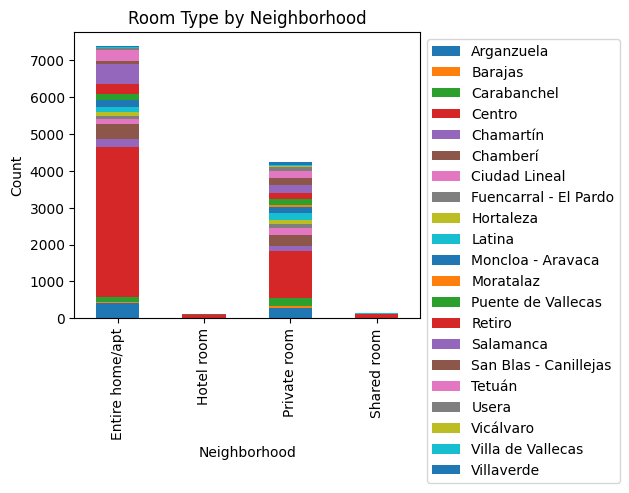

In [ ]:
grouped_data = df.groupby(['room_type', 'neighbourhood_group']).size().unstack()
grouped_data.plot(kind='bar', stacked=True)
plt.title('Room Type by Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Count')
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))
plt.tight_layout()
plt.show()

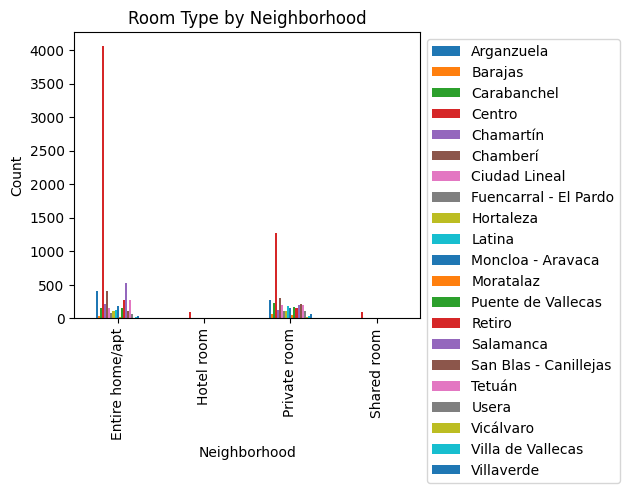

In [ ]:
grouped_data = df.groupby(['room_type', 'neighbourhood_group']).size().unstack()
grouped_data.plot(kind='bar')
plt.title('Room Type by Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Count')
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))
plt.tight_layout()
plt.show()

Arganzuela has 411 Entire home/apt

Barajas has 28 Entire home/apt

Carabanchel has 152 Entire home/apt

Centro has 4065 Entire home/apt

Chamartín has 217 Entire home/apt

Chamberí has 400 Entire home/apt

Ciudad Lineal has 147 Entire home/apt

Fuencarral - El Pardo has 84 Entire home/apt

Hortaleza has 109 Entire home/apt

Latina has 127 Entire home/apt

Moncloa - Aravaca has 182 Entire home/apt

Moratalaz has 18 Entire home/apt

Puente de Vallecas has 151 Entire home/apt

Retiro has 272 Entire home/apt

Salamanca has 528 Entire home/apt


San Blas - Canillejas has 104 Entire home/apt

Tetuán has 279 Entire home/apt

Usera has 64 Entire home/apt

Vicálvaro has 8 Entire home/apt

Villa de Vallecas has 20 Entire home/apt

Villaverde has 35 Entire home/apt

Arganzuela has 1 Hotel room

Centro has 94 Hotel room

Chamartín has 4 Hotel room

Chamberí has 6 Hotel room

Ciudad Lineal has 1 Hotel room

Hortaleza has 5 Hotel room

Moncloa - Aravaca has 1 Hotel room

Moratalaz has 1 Hotel room

Puente de Vallecas has 1 Hotel room

Retiro has 1 Hotel room

Salamanca has 7 Hotel room

Villaverde has 1 Hotel room

Arganzuela has 275 Private room

Barajas has 58 Private room

Carabanchel has 225 Private room

Centro has 1271 Private room

Chamartín has 124 Private room

Chamberí has 310 Private room

Ciudad Lineal has 198 Private room

Fuencarral - El Pardo has 113 Private room

Hortaleza has 104 Private room

Latina has 191 Private room

Moncloa - Aravaca has 159 Private room

Moratalaz has 49 Private room

Puente de Vallecas has 172 Private room

Retiro has 159 Private room

Salamanca has 201 Private room

San Blas - Canillejas has 209 Private room

Tetuán has 192 Private room

Usera has 103 Private room

Vicálvaro has 19 Private room

Villa de Vallecas has 35 Private room

Villaverde has 65 Private room

Arganzuela has 2 Shared room

Barajas has 2 Shared room

Carabanchel has 4 Shared room

Centro has 98 Shared room

Chamartín has 3 Shared room

Chamberí has 11 Shared room

Ciudad Lineal has 9 Shared room

Hortaleza has 1 Shared room

Latina has 5 Shared room

Moncloa - Aravaca has 1 Shared room

Puente de Vallecas has 4 Shared room

Salamanca has 2 Shared room

San Blas - Canillejas has 4 Shared room

Tetuán has 2 Shared room

Usera has 2 Shared room

Villa de Vallecas has 1 Shared room

Villaverde has 2 Shared room
**bold text**

# **Calculating and visualizing the mean(avg) price in each neighborhood**

In [ ]:
average_prices = df.groupby('neighbourhood_group')['price'].mean().reset_index()
average_prices.sort_values(by='price', ascending=False).head(10)

,neighbourhood_group,price
15,San Blas - Canillejas,407.299685
3,Centro,195.367221
14,Salamanca,184.285908
0,Arganzuela,181.953556
5,Chamberí,156.288858
12,Puente de Vallecas,150.588415
1,Barajas,148.090909
6,Ciudad Lineal,145.800000
4,Chamartín,143.436782
13,Retiro,143.270833


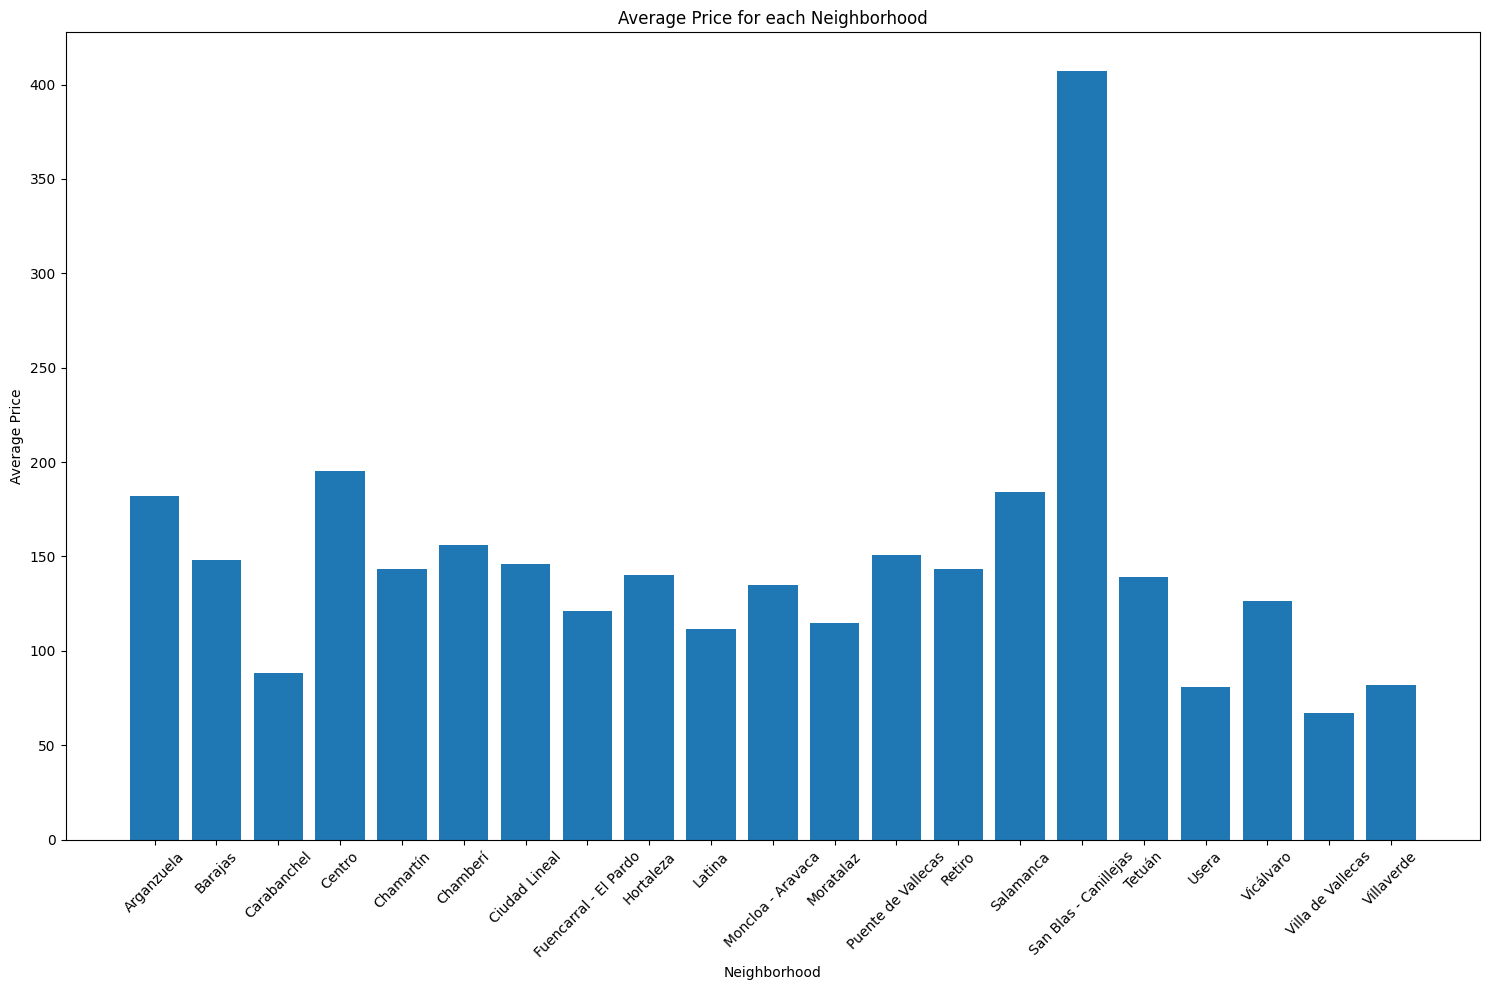

In [ ]:
avg= df.groupby('neighbourhood_group')['price'].mean().reset_index()
plt.figure(figsize=(15, 10))
plt.bar(avg['neighbourhood_group'], avg['price'])
plt.title('Average Price for each Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# **Conclusion:**

#**the average price for the top 5(with highest avg prices)**
**San Blas - Canillejas with mean price=	407.299685**

**Centro with mean price equals	195.367221**

**Salamanca with mean price equals	184.285908**

**Arganzuela with mean price equals	181.953556**

**Chamberí with mean price equals 	156.288858**

# **Calculating and Visualizing the mean of the prices for each neighbourhood_group and room_type (grouped togrther)**

In [ ]:
avg_price_df = df.groupby(['neighbourhood_group','room_type'])['price'].mean().unstack().reset_index()
avg_price_df

room_type,neighbourhood_group,Entire home/apt,Hotel room,Private room,Shared room
0,Arganzuela,165.138686,38.000000,207.040000,260.000000
1,Barajas,159.785714,NaN,145.810345,50.500000
2,Carabanchel,145.901316,NaN,49.137778,85.000000
3,Centro,228.044280,255.648936,93.409127,104.448980
4,Chamartín,148.179724,142.000000,134.500000,171.666667
5,Chamberí,196.412500,94.500000,104.803226,181.909091
6,Ciudad Lineal,156.523810,29.000000,121.535354,517.444444
7,Fuencarral - El Pardo,156.309524,NaN,95.309735,NaN
8,Hortaleza,181.816514,53.400000,102.048077,31.000000
9,Latina,98.952756,NaN,117.198953,208.000000


<ipython-input-110-47a7fc8e847f>:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('viridis')


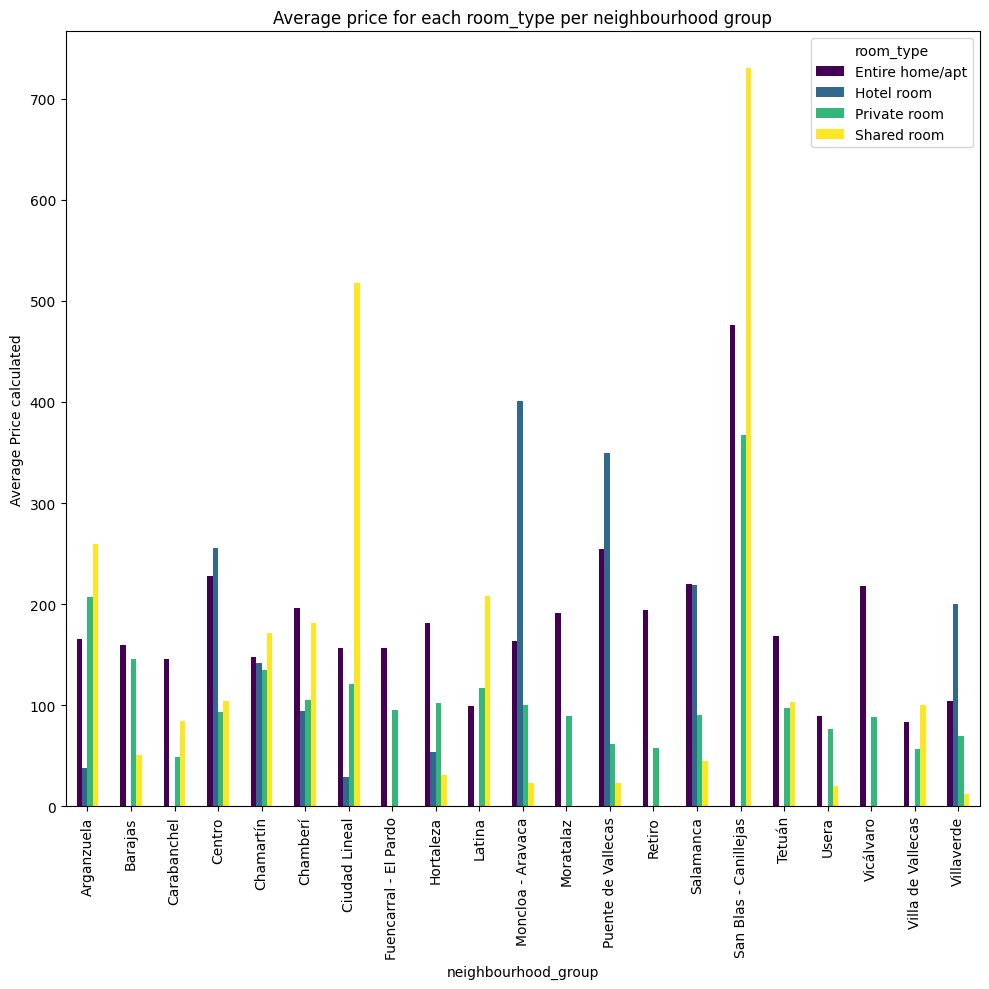

In [ ]:
cmap = plt.cm.get_cmap('viridis')
avg_price_df.plot.bar(figsize=(10, 10), ylabel='Average Price calculated', colormap=cmap)
plt.title("Average price for each room_type per neighbourhood group")
plt.tight_layout()
plt.show()

**WE can conclude that Villa de Vallecas has the cheapest entire home and private room**
**and San Blas - Canillejas has the most expensive entire home, shared room and private room**

# **IN CONCLUSION:**
**1-the top 3 hosts are Javier,Carlos,Daniel
the top 5 hosts in madrid that (umber of reviews wise)**

**2-Javier,Amazinn Places,Leeways and Apartamentos Day Madrid**  

**3- since the most popular 5 neighborhood groups (with most lstings) are Centro,Salamanca,Chamberí,Arganzuela and Retiro
They can increase the number of rooms at those areas especially at Centro as it alone takes up to 46.4% of the total  and the having the highest number of reviews**

**4-the top 5 nighborhoods with highest numbers of reviews are Centro,Arganzuela,Salamanca,Chamberíand Retiro**

**5-the highest room type demanded by customers (listing wise) Entire home/apt then private rooms and the least ones are shared rooms and the hotel rooms**  

**so they can increase the number of the Entire home/apt and private rooms**

**6-Centro has the highest number of listed Entire home/apt ,private rooms ,shared rooms and the hotel rooms**

**7-The top 3 neighborhoods with the highest price mean are San Blas - Canillejas,Centro and Salamanca**
**8-Villa de Vallecas has the cheapest entire home and private room and San Blas - Canillejas has the most expensive entire home, shared room and private room**



# **What Airbnb can do:**

**1-Strengthen Relationships with Top Hosts: Airbnb can focus on supporting and building strong relationships with the top hosts such as Javier, Carlos, and Daniel to ensure they continue to  deliver the same exceptional services to the guests.**

**2-Promote High-Performing Hosts and give attention to the hosts that are not doing well( discussing their performance)**

**3-Expand Listings in Popular Neighborhoods: Since Centro, Salamanca, Chamberí, Arganzuela, and Retiro are the most popular neighborhood groups with the highest number of listings, Airbnb can focus on expanding their inventory in these areas. By increasing the number of rooms and accommodations available in these popular neighborhoods they can attract more guests.**

**4-Enhance Marketing Efforts in Top Neighborhoods: Airbnb should prioritize marketing campaigns and initiatives in Centro, Arganzuela, Salamanca, Chamberí, and Retiro - the top neighborhoods with the highest numbers of reviews.**

 **5-Since the most demanded room types are Entire home
 apartment and private rooms, Airbnb can consider increasing the number of listings in these categories.**

**6-Give Centro more attention: since Centro has the highest number of listed Entire home/apartment, private rooms, shared rooms, and hotel rooms, Airbnb should pay special attention to this neighborhood. They can work closely with hosts in Centro to improve the quality of listings, provide support, and ensure a positive guest experience.**

**7-Premium Market Opportunities: San Blas - Canillejas, Centro, and Salamanca are identified as neighborhoods with the highest average price mean. Airbnb can explore opportunities promot unique and high-end accommodations in these areas.**

**8-Pricing Strategy:
Villa de Vallecas is known for having the cheapest entire home and private rooms, while San Blas - Canillejas has the most expensive entire home, shared room, and private room. Airbnb can analyze the pricing dynamics in these neighborhoods and develop a competitive pricing strategy to attract more bookings while maintaining profitability.**